# Code for generating plots for Fig. S3CD
Run this code sequentially cell by cell.

In [14]:
from matplotlib import pyplot as plt
import os
import numpy as np
from scipy.signal import convolve
import matplotlib as mpl
from scipy import stats

In [2]:
currdir=os.getcwd()

### analyze all flat-bottomed wells

In [3]:
# file with coordinates of wells with different A and T
file=open(currdir+'\\data_Fig_1\experiment_1\shape_table_20x_2023_11_22.csv')
print(file.readline())
shapes = np.array([np.array(list(map(int, line.split(',')))) for line in file])
file.close()
print(len(shapes))
print(shapes[-1])
#eliminate wells with problems
shapes=shapes[shapes[:,4]==0]
shapesraw=shapes
print(len(shapes))

flat=shapes[shapes[:,3]==0][:,[0,1]]

ï»¿stage_position,position_within_field_of_view,sine_amplitude,sine_period,problem

240
[ 59   3  10 100   0]
236


In [8]:
# import data with positions of all bacteria determined using the script ""
spots2=[]
def import_spots2(name,verbose=True):
    global spots2
    with open(name, 'rb') as f:
        for i in range(0,100):
            try:
                coords=np.load(f)
                data=np.load(f)
                _=np.load(f)
                spots2.append((coords,data))
                if (verbose): print(i,": ",coords)
            except ValueError:
                if (verbose): print("end of file")
                break
for pi in np.unique(flat[:,0]):
    import_spots2(currdir+"\\data_S3CD\\spots"+str(pi)+".npy",verbose=False)
print("total = ",len(spots2))

total =  960


### number of R vs G cells

In [9]:
xysR=[[[np.array([]) for t in range(0,5)] for ni in range(0,4)] for pi in range(0,60)]
for i in range(0,len(spots2)):
    p, xy = spots2[i]
    pi,ti,ci,zi,ni,_,_=p
    if ci==1:
        if len(xysR[pi][ni][ti])==0:
            xysR[pi][ni][ti]=xy
        else:
            xysR[pi][ni][ti]=np.append(xysR[pi][ni][ti],xy,axis=0)
xysG=[[[np.array([]) for t in range(0,5)] for ni in range(0,4)] for pi in range(0,60)]
for i in range(0,len(spots2)):
    p, xy = spots2[i]
    pi,ti,ci,zi,ni,_,_=p
    if ci==2:
        if len(xysG[pi][ni][ti])==0:
            xysG[pi][ni][ti]=xy
        else:
            xysG[pi][ni][ti]=np.append(xysG[pi][ni][ti],xy,axis=0)

In [10]:
ti=1
ratios=[]
for pos in flat:
    pi,ni=pos
    ratios.append(len(xysR[pi][ni][ti])/len(xysG[pi][ni][ti]))

print(np.mean(ratios),"+/-",np.std(ratios)/np.sqrt(len(ratios)))

1.0792711879341743 +/- 0.01102277137982002


## this plot (not included in the manuscript) shows the ratio of G:R cells

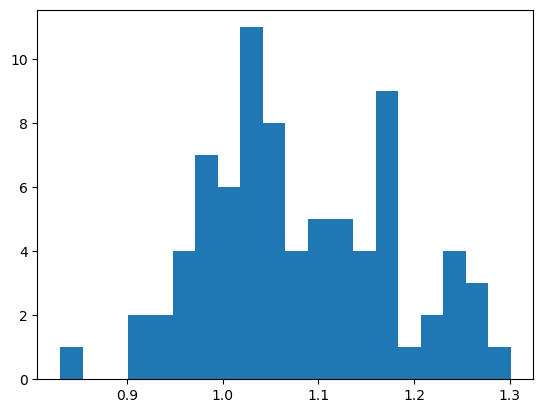

In [11]:
plt.hist(ratios,bins=20)
plt.show()

## Fig. S3C

In [12]:
xys2=[[[np.array([]) for t in range(0,5)] for ni in range(0,4)] for pi in range(0,60)]
for i in range(0,len(spots2)):
    p, xy = spots2[i]
    pi,ti,ci,zi,ni,_,_=p
    if len(xys2[pi][ni][ti])==0:
        xys2[pi][ni][ti]=xy
    else:
        xys2[pi][ni][ti]=np.append(xys2[pi][ni][ti],xy,axis=0)

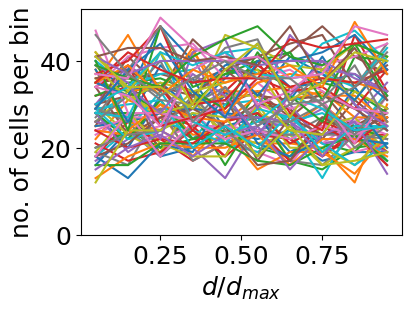

In [15]:
plt.rcParams['font.size'] = '18'
fig,ax=plt.subplots(figsize=(4,3),constrained_layout=True)
fig.patch.set_facecolor('w')

def uni(y):
    return y
pvalues=[]
ti=1
for pos in flat:
    pi,ni=pos
    if (pi<300):
        yrescaled=(xys2[pi][ni][ti][:,0]-np.min(xys2[pi][ni][ti][:,0]))/(np.max(xys2[pi][ni][ti][:,0])-np.min(xys2[pi][ni][ti][:,0]))
        hist=np.histogram(yrescaled, bins=10)
        histctre=[(hist[1][i]+hist[1][i+1])/2 for i in range(0,len(hist[1])-1)]
        plt.plot(histctre,hist[0])
        test=stats.kstest(yrescaled, uni)
        pvalues.append(test.pvalue)
    #print(test.pvalue)
pvalues=np.array(pvalues)
ax.set_ylim(0)
ax.set_xlabel("$d/d_{max}$")
ax.set_ylabel("no. of cells per bin")
fig.savefig(currdir+'\\data_S3CD\\initial_N_vs_d.png',dpi=300)
plt.show()

## Fig. S3D

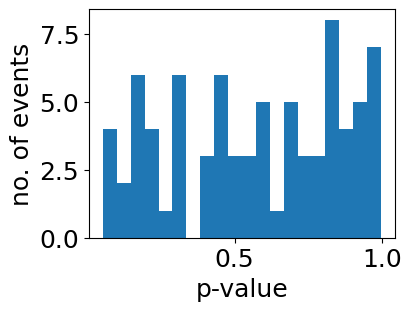

In [17]:
plt.rcParams['font.size'] = '18'
fig,ax=plt.subplots(figsize=(4,3),constrained_layout=True)
fig.patch.set_facecolor('w')

ax.hist(pvalues,bins=20)
ax.set_xlabel("p-value")
ax.set_ylabel("no. of events")
fig.savefig(currdir+'\\data_S3CD\\uniform_initial_p_value.png',dpi=300)
plt.show()

## number of cells per well

In [302]:
cellnos=[]
for pos in flat:
    pi,ni=pos
    cellnos.append(len(xys2[pi][ni][ti]))
print(np.mean(cellnos),"+/-",np.std(cellnos)/np.sqrt(len(cellnos)))
print("min=",np.min(cellnos)," max=",np.max(cellnos))

294.0759493670886 +/- 7.528842626012398
min= 188  max= 414
